In [1]:
!pip3 install -r "requirements.txt"

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
import os

In [4]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = max(self.q_values[next_state])
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = int(np.argmax(q_values))
        ###########################################################################
        return action

In [5]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)

        q_value = self.q_values[state][action]
        next_q_value = self.q_values[next_state][next_action]

        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = int(np.argmax(q_values))
        return action


In [6]:
from utils import gen_wrapped_env, show_video

In [7]:
!pip3 install ffmpeg
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
# env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = SARSA(4, agent_position)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
rewards = []
for ep in range(10000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
rewards_sarsa = rewards

with open(f'./logs/qtable_SARSA.json', 'w') as f:
            json.dump({str(s): np.round(q, 5).tolist() for s, q in agent.q_values.items()}, f)
    
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [9]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.02039, 0.02037, 0.02136, 0.02018],
 3: [0.00572, 0.00611, 0.01201, 0.00539],
 15: [0.00629, 0.00696, 0.04755, 0.00607],
 27: [0.03228, 0.02925, 0.15255, 0.02756],
 12: [0.03706, 0.03669, 0.04226, 0.03709],
 24: [0.05298, 0.05282, 0.06123, 0.05282],
 18: [0.00974, 0.00885, 0.07147, 0.01035],
 39: [0.30895, 0.29728, 0.36836, 0.30222],
 30: [0.03706, 0.03454, 0.21231, 0.02643],
 6: [0.00616, 0.00606, 0.01285, 0.00638],
 21: [0.06127, 0.06311, 0.10862, 0.05809],
 36: [0.06539, 0.06524, 0.07292, 0.06517],
 9: [0.01444, 0.01411, 0.01912, 0.0145],
 33: [0.17936, 0.19177, 0.28219, 0.17684],
 42: [0.42472, 0.42275, 0.52592, 0.41935],
 45: [0.0, 0.0, 0.0, 0.0]}

In [10]:
show_video()

In [11]:
import os
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [12]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
# env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(4, agent_position)

In [13]:
rewards = []
for ep in range(10000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
rewards_qlearning = rewards

with open(f'./logs/qtable_Qlearning.json', 'w') as f:
            json.dump({str(s): np.round(q, 5).tolist() for s, q in agent.q_values.items()}, f)
    
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [14]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03615, 0.0363, 0.03818, 0.03612],
 12: [0.05876, 0.05904, 0.06843, 0.05878],
 24: [0.07914, 0.07819, 0.08717, 0.07879],
 36: [0.0971, 0.09678, 0.10069, 0.09686],
 3: [0.01571, 0.01549, 0.02683, 0.01654],
 27: [0.0436, 0.02998, 0.20384, 0.03254],
 30: [0.04507, 0.04861, 0.27252, 0.04346],
 6: [0.01605, 0.01497, 0.03072, 0.01652],
 9: [0.02878, 0.02872, 0.03611, 0.02878],
 15: [0.01232, 0.01012, 0.08381, 0.0116],
 18: [0.02157, 0.01853, 0.11953, 0.01986],
 42: [0.4567, 0.45618, 0.55053, 0.46383],
 39: [0.35151, 0.36795, 0.45085, 0.36788],
 21: [0.10556, 0.10459, 0.15057, 0.10838],
 33: [0.22927, 0.23987, 0.3192, 0.23983],
 45: [0.0, 0.0, 0.0, 0.0]}

In [15]:
show_video()

In [16]:
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [17]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

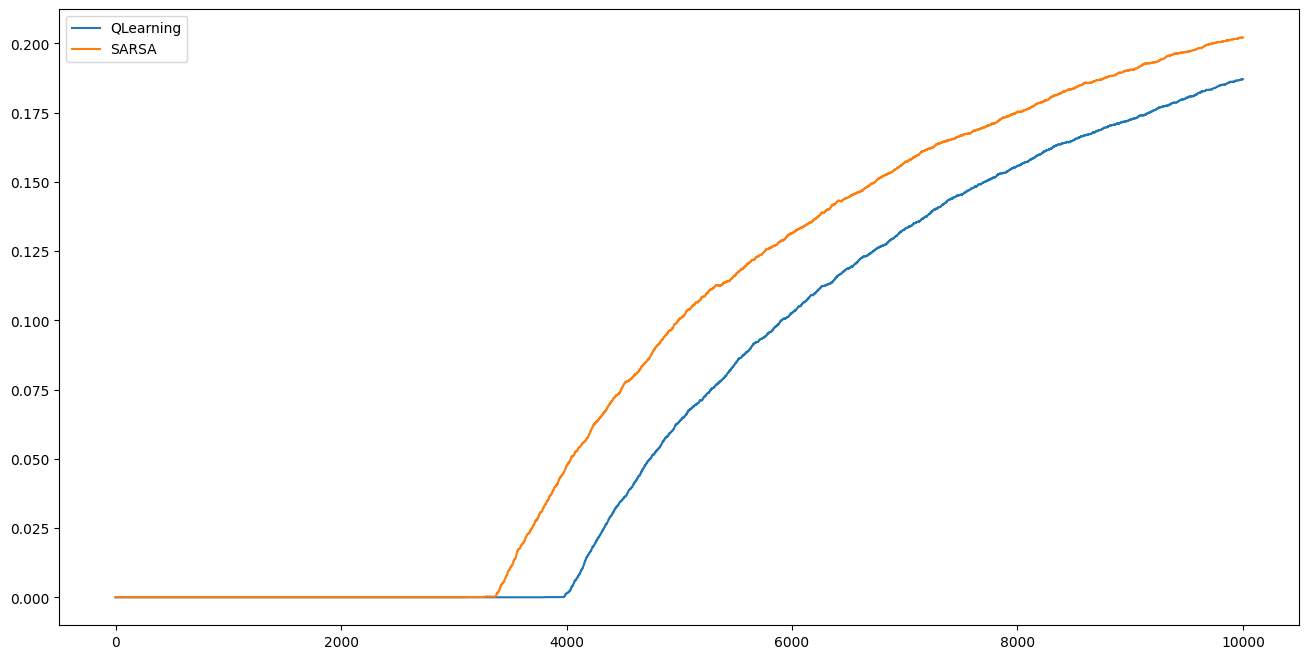

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()

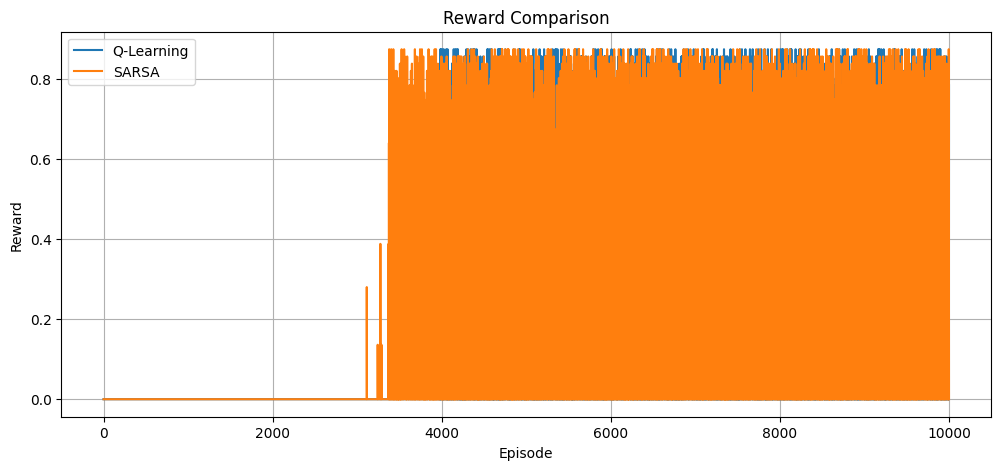

In [19]:

min_len = min(len(rewards_qlearning), len(rewards_sarsa))

# Reward Plot
plt.figure(figsize=(12, 5))
plt.plot(rewards_qlearning[:min_len], label='Q-Learning')
plt.plot(rewards_sarsa[:min_len], label='SARSA')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Comparison")
plt.legend()
plt.grid(True)
plt.show()

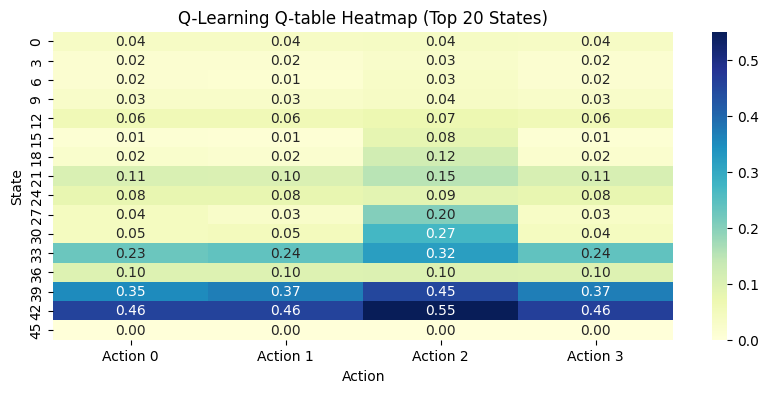

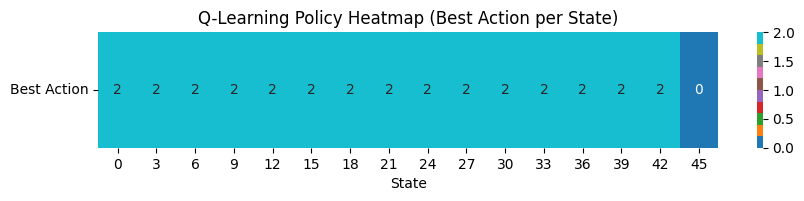

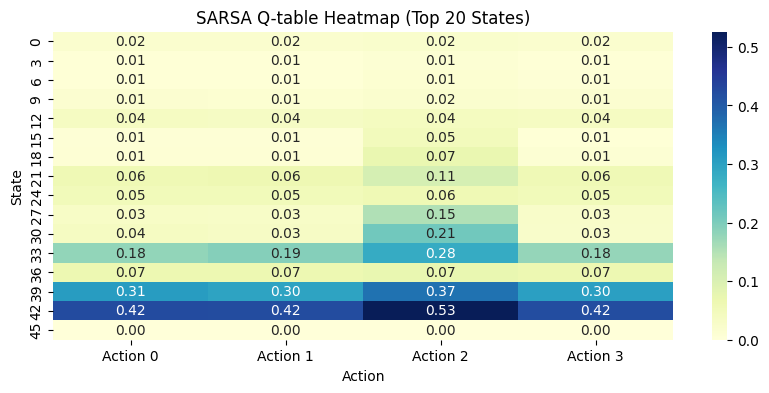

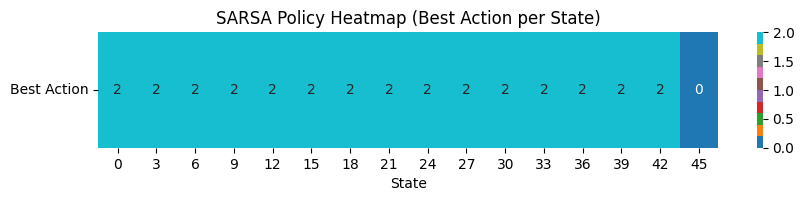

In [20]:

def load_qtable(path):
    with open(path, 'r') as f:
        return {int(s): q for s, q in json.load(f).items()}

def q_table_to_dataframe(q_values, top_n=20):
    df = pd.DataFrame.from_dict(q_values, orient='index')
    df.index.name = "State"
    df.columns = ["Action 0", "Action 1", "Action 2", "Action 3"]
    return df.sort_index().head(top_n)

def plot_q_heatmap(q_values, title_prefix="Q-Learning", top_n=20):
    q_df = q_table_to_dataframe(q_values, top_n)
    plt.figure(figsize=(10, 4))
    sns.heatmap(q_df, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"{title_prefix} Q-table Heatmap (Top {top_n} States)")
    plt.xlabel("Action")
    plt.ylabel("State")
    plt.show()

def plot_policy_heatmap(q_values, title_prefix="Q-Learning"):
    policy = {s: int(np.argmax(q)) for s, q in q_values.items()}
    policy_df = pd.Series(policy).sort_index().to_frame(name="Best Action")
    plt.figure(figsize=(10, 1.5))
    sns.heatmap(policy_df.T, cmap="tab10", annot=True, fmt="d", cbar=True)
    plt.title(f"{title_prefix} Policy Heatmap (Best Action per State)")
    plt.xlabel("State")
    plt.yticks(rotation=0)
    plt.show()

# 🔁 Load both Q-tables
qtable_q = load_qtable('./logs/qtable_QLearning.json')
qtable_s = load_qtable('./logs/qtable_SARSA.json')

# 🎨 Q-table 시각화
plot_q_heatmap(qtable_q, title_prefix="Q-Learning", top_n=20)
plot_policy_heatmap(qtable_q, title_prefix="Q-Learning")

plot_q_heatmap(qtable_s, title_prefix="SARSA", top_n=20)
plot_policy_heatmap(qtable_s, title_prefix="SARSA")